In [ ]:
import pandas as pd

df = pd.read_excel('serie_g.xlsx', sheet_name="Plan2")

df.insert(0, "k-1", None)
df.insert(0, "k-12", None)

df.rename(columns={"mês": "k"}, inplace=True)

for i in range(0, len(df)):
    try:
        df.at[i, "k-1"] = df.at[i-1, "VVP"]
    except:
        df.at[i, "k-1"] = 0

for i in range(0, len(df)):
    try:
        df.at[i, "k-12"] = df.at[i-12, "VVP"]
    except:
        df.at[i, "k-12"] = 0

df.head(20)

,k-12,k-1,k,VVP
0,0,0,1,112
1,0,112,2,118
2,0,118,3,132
3,0,132,4,129
4,0,129,5,121
5,0,121,6,135
6,0,135,7,148
7,0,148,8,148
8,0,148,9,136
9,0,136,10,119


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['k-1', 'k-12']]
Y = df['VVP']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [ ]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90, 2), (30, 2), (90,), (30,))

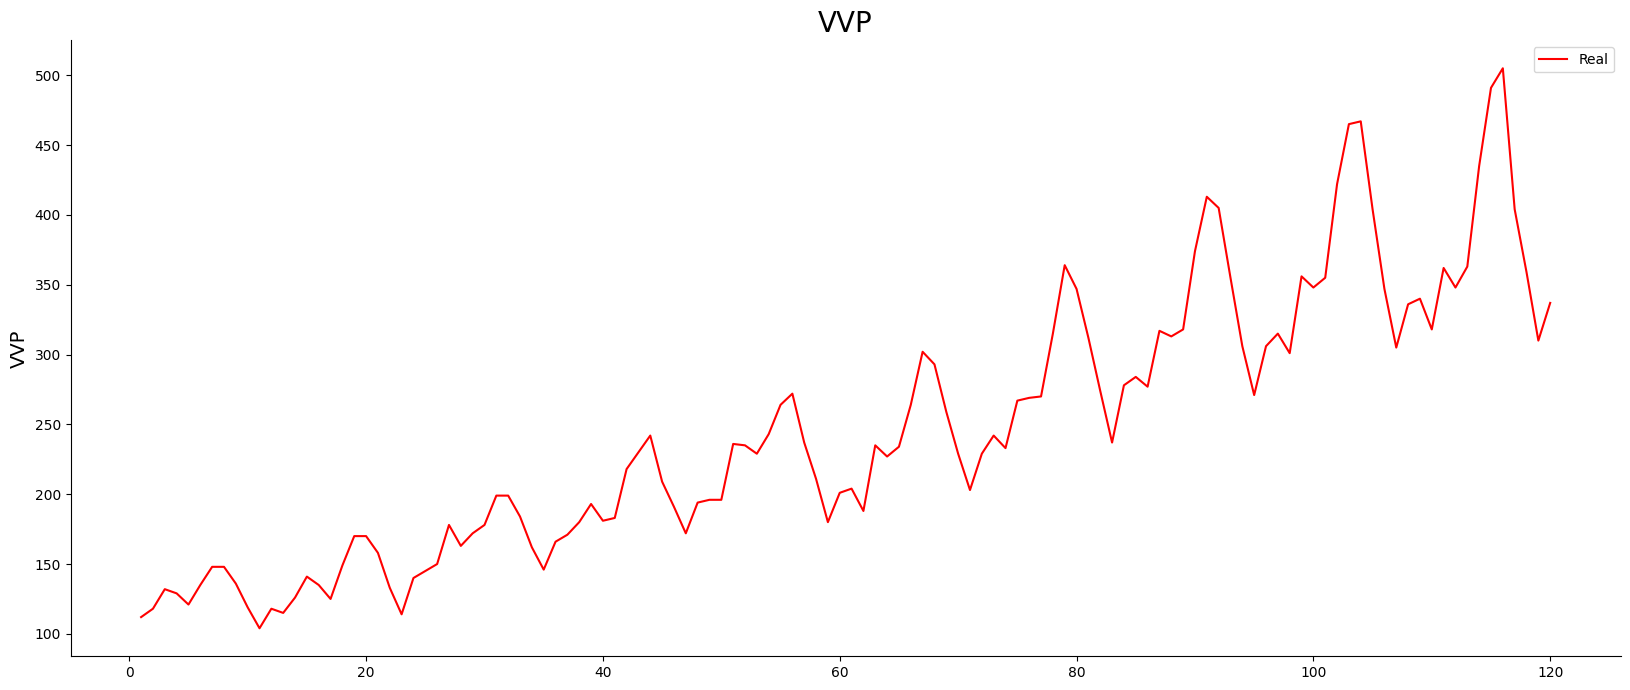

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

rcParams['figure.figsize'] = (20, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(np.arange(1, len(Y)+1), Y, color='red',label='Real')
plt.title('VVP', size=20)
plt.ylabel('VVP', size=14)
plt.legend();

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
import numpy as np

model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=100,
                    batch_size=32,
                    verbose=1)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 1000)              3000      
                                                                 
 dense_49 (Dense)            (None, 500)               500500    
                                                                 
 dense_50 (Dense)            (None, 250)               125250    
                                                                 
 dense_51 (Dense)            (None, 1)                 251       
                                                                 
Total params: 629,001
Trainable params: 629,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 4s 375ms/step - loss: 73659.1016 - mse: 73659.1016 - val_loss: 56173.8711 - val_mse: 56173.8711
Epoch 2/100
3/3 [===============

In [ ]:
pred = model.predict(X_test)

1/1 [==============================] - 0s 71ms/step


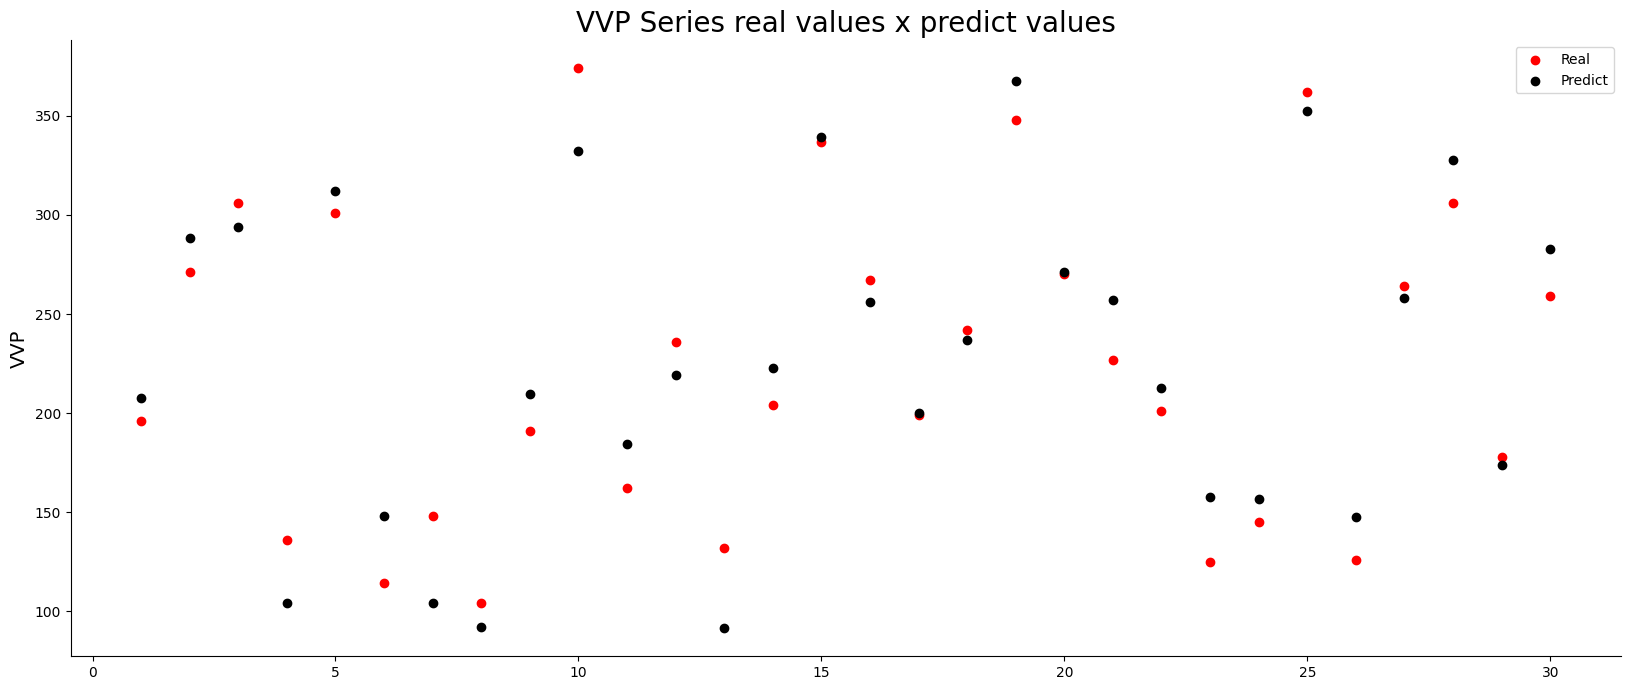

In [ ]:
plt.scatter(np.arange(1, len(y_test)+1), y_test, color='red', label='Real')
plt.scatter(np.arange(1, len(y_test)+1), pred, color='black', label='Predict')
plt.title('VVP Series real values x predict values', size=20)
plt.ylabel('VVP', size=14)
plt.legend();

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred_linear = linear_model.predict(X_test)
print(pred_linear)

[207.00209869 287.72660784 293.51730694 101.42320586 311.67681262
 147.40618115 101.42320586  89.12270698 208.83454377 332.07544617
 183.6343792  218.92345367  88.69855184 222.55418998 339.2519296
 255.75664263 199.71229633 236.36464951 367.34783914 270.52290724
 256.6049529  212.64029174 156.81093506 155.91178945 352.71157496
 146.81787174 257.4815929  327.13305733 173.23966636 282.2125911 ]


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, pred_linear)

0.9193698617459553

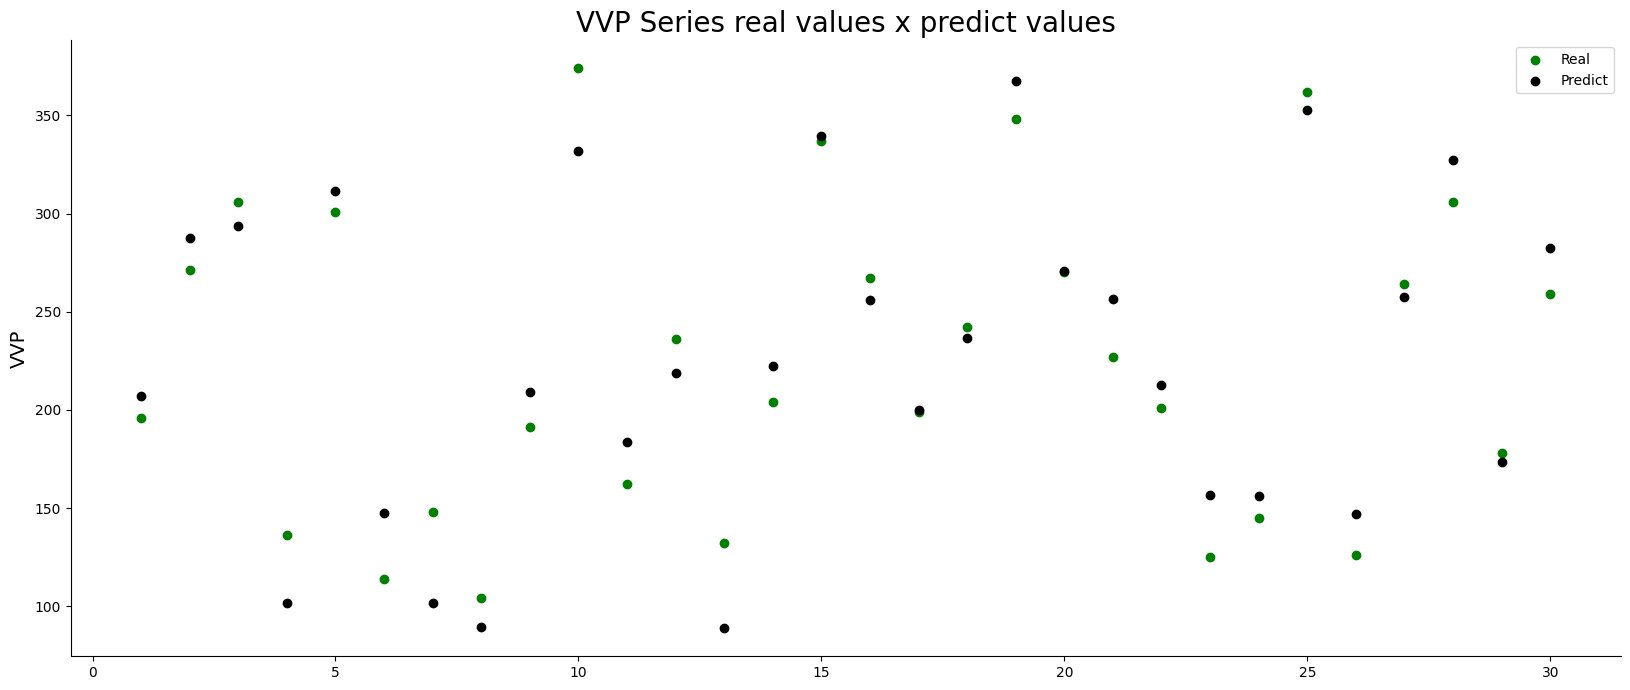

In [ ]:
plt.scatter(np.arange(1, len(y_test)+1), y_test, color='green', label='Real')
plt.scatter(np.arange(1, len(y_test)+1), pred_linear, color='black', label='Predict')
plt.title('VVP Series real values x predict values', size=20)
plt.ylabel('VVP', size=14)
plt.legend();